# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** B

**Names:**

* Vincenzo Bazzucchi
* Amaury Combes
* Alexis Montavon

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import groupby
import numpy as np
from collections import Counter
%matplotlib inline

In [18]:
def read_edge_file(pathname):
    f = open(pathname, 'r')
    G = nx.Graph()
    for line in f:
        if line[0] == '#':
            continue
        line = f.readline().split(',')
        G.add_edge(int(line[0]) , int(line[1]))
    f.close()
    return G

In [19]:
G1 = read_edge_file('../data/network1.csv')

In [20]:
print("The network has", len(G1), "nodes", "and", G1.size(), "edges")

The network has 8419 nodes and 9292 edges


#### Exercise 2.2:  Node degree distribution

In [69]:
def compute_deg_dist(graph):
    degrees = nx.degree(graph)
    deg_distr = Counter()
    for deg in degrees.values():
        deg_distr[deg] += 1
    deg_distr = {k: (deg_distr[k] / len(degrees.keys())) for k in deg_distr.keys()}
    return deg_distr

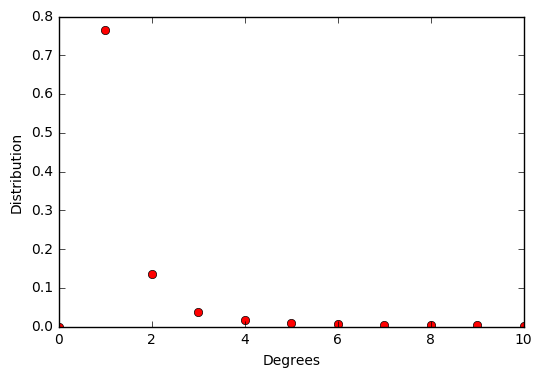

In [70]:
deg_distr = compute_deg_dist(G1)
N = 10
fig, ax = plt.subplots()
x = list(deg_distr.keys())[:N]
x.insert(0, 0)
y = list(deg_distr.values())[:N]
y.insert(0, 0)
ax.plot(x, y, 'ro')
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Distribution")
plt.show()

!!!Missing answer to question 2.2.1 & 2.2.2

This distribution looks like a Poisson distribution (discret equivalent of the power law distribution). We didn't plot further than degree 10 because the probability drop below 0.01%.

Here we find a lambda value based on the maximum likelyhood estimator and plot the Poisson ditribution accordingly.

In [52]:
from scipy.stats import poisson
mle_poisson = lambda sample, n: sum(sample[:n]) / n # use mle to find mu

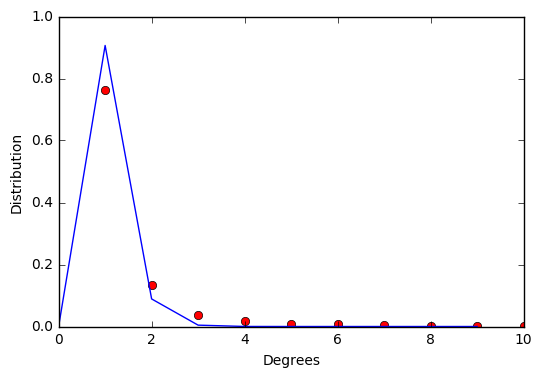

In [53]:
fig, ax = plt.subplots()
ax.plot(list(deg_distr.keys())[:N], list(deg_distr.values())[:N], 'ro')
mu = mle_poisson(list(deg_distr.values()), N)
gen_data = [poisson.pmf(x, mu, 1) for x in range(N)]
ax.plot(gen_data)
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Distribution")
plt.show()

#### Exercise 2.3: Giant component

In [54]:
connected_components = sorted(nx.connected_component_subgraphs(G1), key=len, reverse=True)

Amount of connected components: 480
Ten biggest connected component ordered by size [7077, 20, 19, 16, 15, 13, 11, 10, 9, 9]


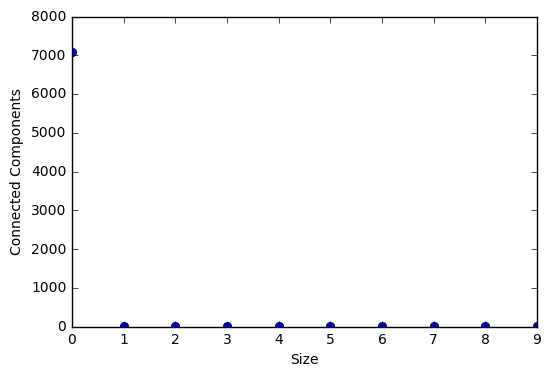

In [55]:
num_of_connected_components = len(connected_components)
dimensions = [len(cc) for cc in connected_components]
print("Amount of connected components:", num_of_connected_components)
print("Ten biggest connected component ordered by size", dimensions[:N])

fig, ax = plt.subplots()
ax.plot(dimensions[:N], 'o')
ax.xaxis.set_label_text("Size")
ax.yaxis.set_label_text("Connected Components")
plt.show()

This plot represent the ten biggest connected components. We can easily see that there exists a giant component containing 7077 nodes, which represent $\approx$84.06% of the graph.

#### Exercise 2.4: Short paths & Small-worlds

In [57]:
# ATTENTION: Run only on cluster. SLOW
path_lengths = nx.all_pairs_shortest_path_length(giant_component)
avg_shortest = nx.average_shortest_path_length(giant_component)
print("Average shortest path", avg_shortest)

Average shortest path 4.698255872793282


In [58]:
def path_length_distribution(path_lengths):
    distribution = Counter()
    for dest in path_lengths.values():
        for dist in dest.values():
            distribution[dist] += 1
    return {k: distribution[k] / len(path_lengths) for k in distribution.keys()}

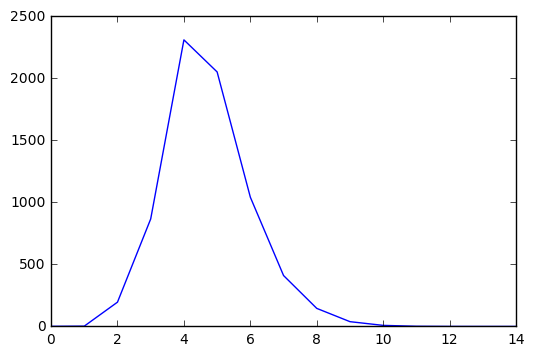

In [59]:
# x = distance, y = (number of couple of nodes at this distance / number of nodes)  Do we need division?
distribution = path_length_distribution(path_lengths)
plt.plot(list(distribution.keys()), list(distribution.values()))

#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification